In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

print('Physical Devices:')
for dev in tf.config.list_physical_devices():
    print(dev)

Physical Devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [3]:
from zscomm.agent import Agent
from zscomm.comm_channel import CommChannel
from zscomm.synth_teacher import SyntheticTeacher
from zscomm.data import *
from zscomm.play_game import *
from zscomm.loss import *
from zscomm.experiment import Experiment
from zscomm.meta_experiment import *
from zscomm.plot_game import plot_game
from zscomm.analysis import *

## Load Data:

In [4]:
NUM_CLASSES = 3
CHANNEL_SIZE = 5
BATCH_SIZE = 32
USE_MNIST = False

if USE_MNIST:
    TRAIN_DATA, TEST_DATA = get_mnist_data(num_classes=NUM_CLASSES)
else:
    TRAIN_DATA, TEST_DATA = get_simple_card_data(num_classes=NUM_CLASSES)

In [5]:
def generate_train_batch():
    return generate_batch(TRAIN_DATA,
                          batch_size=BATCH_SIZE, 
                          num_classes=NUM_CLASSES)


def generate_test_batch():
    return generate_batch(TEST_DATA,
                          batch_size=BATCH_SIZE, 
                          num_classes=NUM_CLASSES)

# Run Experiments

In [6]:
def create_temporal_fixing_experiment(epochs=15, **exp_kwargs):
    
    agent = Agent(CHANNEL_SIZE, NUM_CLASSES, first_activation='relu')

    play_params =  {
        'channel_size': CHANNEL_SIZE,
        'p_mutate': 0.0
    }
    
    return Experiment(
        generate_train_batch, generate_test_batch,
        play_params=play_params, 
        student=agent,
        teacher=agent,
        loss_fn=complete_loss_fn,
        max_epochs=epochs,
        **exp_kwargs
    )

def create_observation_fixing_experiment(epochs=15, **exp_kwargs):
    
    agent = Agent(CHANNEL_SIZE, NUM_CLASSES, first_activation=None)

    play_params = {
        'channel_size': CHANNEL_SIZE,
        'p_mutate': 0.0
    }
    
    return Experiment(
        generate_train_batch, generate_test_batch,
        play_params=play_params, 
        student=agent,
        teacher=agent,
        loss_fn=complete_loss_fn,
        max_epochs=epochs,
        **exp_kwargs
    )

In [7]:
obs_fixing_experiment = create_observation_fixing_experiment()

In [8]:
obs_fixing_experiment.run()

Running experiment...
Run config:
 {'name': 'experiment', 'max_epochs': 15, 'steps_per_epoch': 50, 'epochs_optimised': 15, 'play_params': {'channel_size': 5, 'p_mutate': 0.0}, 'test_freq': 5, 'test_steps': 25, 'optimiser_config': {'name': 'RMSprop', 'learning_rate': 0.009999999776482582, 'decay': 0.0, 'rho': 0.8999999761581421, 'momentum': 0.0, 'epsilon': 1e-07, 'centered': False}, 'optimise_agents_separately': False, 'loss_fn': 'complete_loss_fn'}
Epoch 0, Time Taken (mm:ss): 0:12, Mean Loss: 3.822
Test Loss: 4.29, Ground Truth F1-Score: 0.319, Student Error: 1.092, Teacher Error: 0.524, Protocol Diversity: 0.388, Protocol Entropy: 1.13,
Epoch 1, Time Taken (mm:ss): 0:12, Mean Loss: 2.566
Epoch 2, Time Taken (mm:ss): 0:13, Mean Loss: 1.074
Epoch 3, Time Taken (mm:ss): 0:11, Mean Loss: 1.004
Epoch 4, Time Taken (mm:ss): 0:11, Mean Loss: 1.0
Epoch 5, Time Taken (mm:ss): 0:10, Mean Loss: 1.0
Test Loss: 1.0, Ground Truth F1-Score: 1.0, Student Error: 0.0, Teacher Error: 0.0, Protocol Dive

In [9]:
obs_fixing_experiment.results

{'training_params_results': {'mean_test_loss': 1.0000001192092896,
  'mean_ground_truth_f1': 1.0,
  'ground_truth_acc': 1.0,
  'mean_student_error': 1.1920928955078125e-07,
  'mean_teacher_error': 1.1920928955078125e-07,
  'mean_protocol_diversity': 1.0,
  'mean_protocol_entropy': 7.222239013367687e-35},
 'vanilla_params_results': {'mean_test_loss': 1.0000001192092896,
  'mean_ground_truth_f1': 1.0,
  'ground_truth_acc': 1.0,
  'mean_student_error': 1.1920928955078125e-07,
  'mean_teacher_error': 1.1920928955078125e-07,
  'mean_protocol_diversity': 1.0,
  'mean_protocol_entropy': 7.222239013367687e-35},
 'student_responsiveness': 0.000139189938049775,
 'teacher_responsiveness': 2.0604964085869643e-06}

In [14]:
round(obs_fixing_experiment.results['teacher_responsiveness'], 4), round(obs_fixing_experiment.results['student_responsiveness'], 4)

(0.0, 0.0001)

In [10]:
temp_fixing_experiment = create_temporal_fixing_experiment()

In [11]:
temp_fixing_experiment.run()

Running experiment...
Run config:
 {'name': 'experiment', 'max_epochs': 15, 'steps_per_epoch': 50, 'epochs_optimised': 15, 'play_params': {'channel_size': 5, 'p_mutate': 0.0}, 'test_freq': 5, 'test_steps': 25, 'optimiser_config': {'name': 'RMSprop', 'learning_rate': 0.009999999776482582, 'decay': 0.0, 'rho': 0.8999999761581421, 'momentum': 0.0, 'epsilon': 1e-07, 'centered': False}, 'optimise_agents_separately': False, 'loss_fn': 'complete_loss_fn'}
Epoch 0, Time Taken (mm:ss): 0:11, Mean Loss: 3.856
Test Loss: 4.672, Ground Truth F1-Score: 0.33, Student Error: 1.099, Teacher Error: 0.573, Protocol Diversity: 0.333, Protocol Entropy: 1.6,
Epoch 1, Time Taken (mm:ss): 0:9, Mean Loss: 3.843
Epoch 2, Time Taken (mm:ss): 0:8, Mean Loss: 3.809
Epoch 3, Time Taken (mm:ss): 0:8, Mean Loss: 3.814
Epoch 4, Time Taken (mm:ss): 0:8, Mean Loss: 3.774
Epoch 5, Time Taken (mm:ss): 0:8, Mean Loss: 3.7
Test Loss: 3.924, Ground Truth F1-Score: 0.38, Student Error: 1.098, Teacher Error: 0.826, Protocol D

In [12]:
temp_fixing_experiment.results

{'training_params_results': {'mean_test_loss': 1.001114845275879,
  'mean_ground_truth_f1': 1.0,
  'ground_truth_acc': 1.0,
  'mean_student_error': 0.00011422068200772628,
  'mean_teacher_error': 0.0010008831741288304,
  'mean_protocol_diversity': 1.0,
  'mean_protocol_entropy': 7.222239013367687e-35},
 'vanilla_params_results': {'mean_test_loss': 1.0011638402938843,
  'mean_ground_truth_f1': 1.0,
  'ground_truth_acc': 1.0,
  'mean_student_error': 0.00011864111002068967,
  'mean_teacher_error': 0.0010451297275722027,
  'mean_protocol_diversity': 1.0,
  'mean_protocol_entropy': 7.222239013367687e-35},
 'student_responsiveness': 0.052838759666800544,
 'teacher_responsiveness': 0.00032712243169778234}

In [15]:
round(temp_fixing_experiment.results['teacher_responsiveness'], 4), round(temp_fixing_experiment.results['student_responsiveness'], 4)

(0.0003, 0.0528)

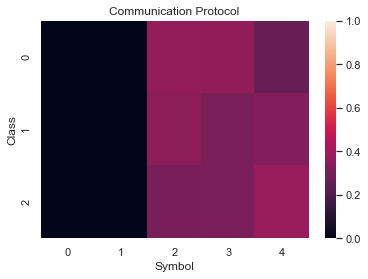

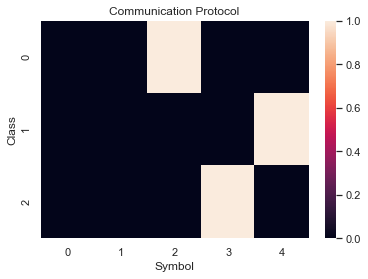

In [15]:
games_played, _ = temp_fixing_experiment.run_tests()
mean_class_message_map = create_mean_class_message_map(games_played)
sns.heatmap(mean_class_message_map, vmin=0, vmax=1);
plt.ylabel('Class')
plt.xlabel('Symbol')
plt.title('Communication Protocol')
plt.show()

games_played, _ = temp_fixing_experiment.run_tests()
mean_class_message_map = create_mean_index_message_map(games_played)
sns.heatmap(mean_class_message_map, vmin=0, vmax=1);
plt.ylabel('Class')
plt.xlabel('Symbol')
plt.title('Communication Protocol')
plt.show()

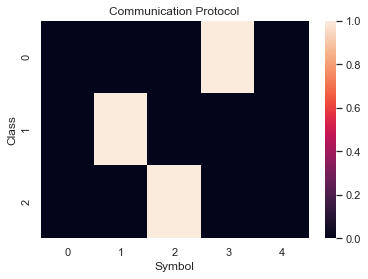

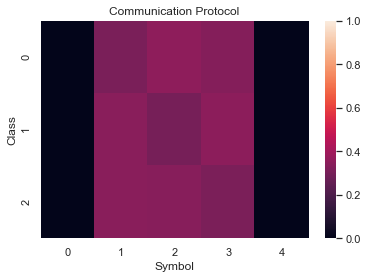

In [16]:
games_played, _ = obs_fixing_experiment.run_tests()
mean_class_message_map = create_mean_class_message_map(games_played)
sns.heatmap(mean_class_message_map, vmin=0, vmax=1);
plt.ylabel('Class')
plt.xlabel('Symbol')
plt.title('Communication Protocol')
plt.show()

games_played, _ = obs_fixing_experiment.run_tests()
mean_class_message_map = create_mean_index_message_map(games_played)
sns.heatmap(mean_class_message_map, vmin=0, vmax=1);
plt.ylabel('Class')
plt.xlabel('Symbol')
plt.title('Communication Protocol')
plt.show()

In [42]:
def test_at_different_pms(experiment):
    results = []
    for i in range(6):
        override_play_params = {
            'p_mutate': i / 5.
        }
        _, test_metrics = experiment.run_tests(override_play_params) 
        results.append(test_metrics)
    return results

In [23]:
pms = [i / 5. for i in range(6)]

In [40]:
lstm_layer, *_ = [layer for layer in temp_fixing_experiment.student.layers
                  if isinstance(layer, tf.keras.layers.LSTM)]
for w in lstm_layer.weights:
    x = np.abs(w.numpy())
    print(w.name, 'mean:', x.mean(), '+-', x.std(), 'max:', x.max())

agent/lstm_3/kernel:0 mean: 0.19855633 +- 0.2031684 max: 1.8062485
agent/lstm_3/recurrent_kernel:0 mean: 0.2491347 +- 0.19915468 max: 1.3586373
agent/lstm_3/bias:0 mean: 0.30014616 +- 0.28910568 max: 1.2792614


In [41]:
lstm_layer, *_ = [layer for layer in obs_fixing_experiment.student.layers
                  if isinstance(layer, tf.keras.layers.LSTM)]
for w in lstm_layer.weights:
    x = np.abs(w.numpy())
    print(w.name, 'mean:', x.mean(), '+-', x.std(), 'max:', x.max())

agent/lstm_1/kernel:0 mean: 0.17455122 +- 0.12975018 max: 0.8651691
agent/lstm_1/recurrent_kernel:0 mean: 0.120519325 +- 0.09200063 max: 0.71327686
agent/lstm_1/bias:0 mean: 0.28000247 +- 0.3276045 max: 1.2263657


In [43]:
temp_pm_tests = test_at_different_pms(temp_fixing_experiment)

In [73]:
temp_pm_tests

[{'mean_test_loss': 1.0004513263702393,
  'mean_ground_truth_f1': 1.0,
  'ground_truth_acc': 1.0,
  'mean_student_error': 4.647959576686844e-05,
  'mean_teacher_error': 0.0004048825358040631,
  'mean_protocol_diversity': 1.0,
  'mean_protocol_entropy': 7.222239013367687e-35},
 {'mean_test_loss': 4.0648088455200195,
  'mean_ground_truth_f1': 0.865,
  'ground_truth_acc': 0.865,
  'mean_student_error': 1.3268169164657593,
  'mean_teacher_error': 1.670491337776184,
  'mean_protocol_diversity': 0.9662500023841858,
  'mean_protocol_entropy': 0.01080018188804388},
 {'mean_test_loss': 6.021113395690918,
  'mean_ground_truth_f1': 0.775,
  'ground_truth_acc': 0.775,
  'mean_student_error': 2.187345504760742,
  'mean_teacher_error': 2.721269130706787,
  'mean_protocol_diversity': 0.9437500238418579,
  'mean_protocol_entropy': 0.018000302836298943},
 {'mean_test_loss': 8.072668075561523,
  'mean_ground_truth_f1': 0.62375,
  'ground_truth_acc': 0.62375,
  'mean_student_error': 3.0739800930023193,
 

In [44]:
obs_pm_tests = test_at_different_pms(obs_fixing_experiment)

In [74]:
obs_pm_tests

[{'mean_test_loss': 1.0000001192092896,
  'mean_ground_truth_f1': 1.0,
  'ground_truth_acc': 1.0,
  'mean_student_error': 1.1920928955078125e-07,
  'mean_teacher_error': 1.1920928955078125e-07,
  'mean_protocol_diversity': 1.0,
  'mean_protocol_entropy': 7.222239013367687e-35},
 {'mean_test_loss': 5.561307430267334,
  'mean_ground_truth_f1': 1.0,
  'ground_truth_acc': 1.0,
  'mean_student_error': 1.90535569190979,
  'mean_teacher_error': 2.518453359603882,
  'mean_protocol_diversity': 0.9312499761581421,
  'mean_protocol_entropy': 0.022000370547175407},
 {'mean_test_loss': 9.716745376586914,
  'mean_ground_truth_f1': 1.0,
  'ground_truth_acc': 1.0,
  'mean_student_error': 3.5804314613342285,
  'mean_teacher_error': 4.9563164710998535,
  'mean_protocol_diversity': 0.9100000262260437,
  'mean_protocol_entropy': 0.028800485655665398},
 {'mean_test_loss': 14.113471984863281,
  'mean_ground_truth_f1': 1.0,
  'ground_truth_acc': 1.0,
  'mean_student_error': 5.299543380737305,
  'mean_teacher

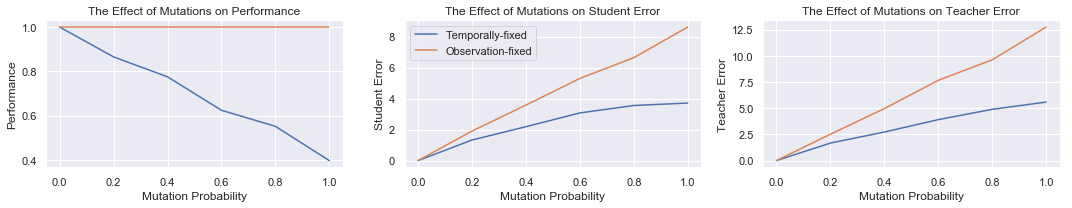

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

metrics = {
    'ground_truth_acc': 'Performance', 
    'mean_student_error': 'Student Error', 
    'mean_teacher_error': 'Teacher Error'
}

for i, metric in enumerate(metrics):

    temp_vals = [
        metrics[metric] for metrics in temp_pm_tests
    ]
    sns.lineplot(x=pms, y=temp_vals, label='Temporally-fixed', ax=axs[i])

    obs_vals = [
        metrics[metric] for metrics in obs_pm_tests
    ]
    sns.lineplot(x=pms, y=obs_vals, label='Observation-fixed', ax=axs[i])

    axs[i].set_xlim([-.05, 1.05])
    axs[i].set_title(f'The Effect of Mutations on {metrics[metric]}')
    axs[i].set_xlabel('Mutation Probability')
    axs[i].set_ylabel(metrics[metric])
    
    if i != 1:
        axs[i].get_legend().remove()

plt.tight_layout()
plt.show()

In [27]:
games_played, _ = temp_fixing_experiment.run_tests({'p_mutate': 0.8}) 

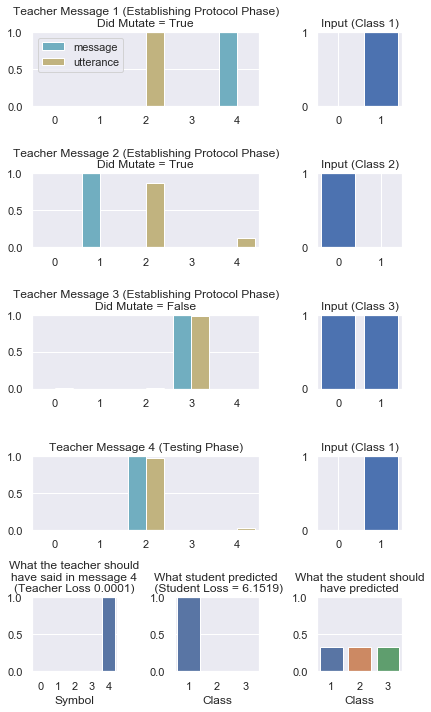

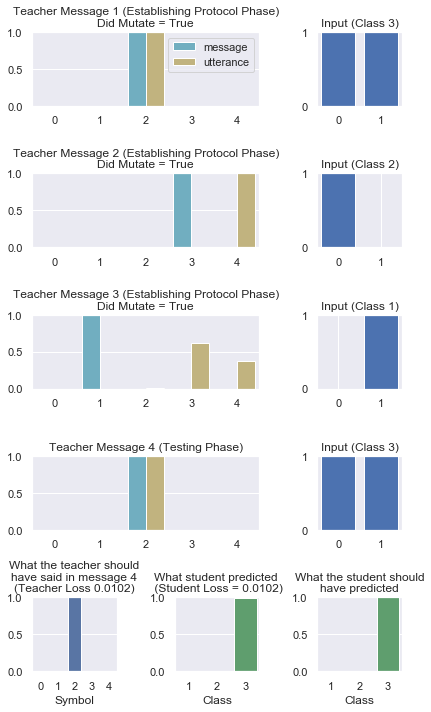

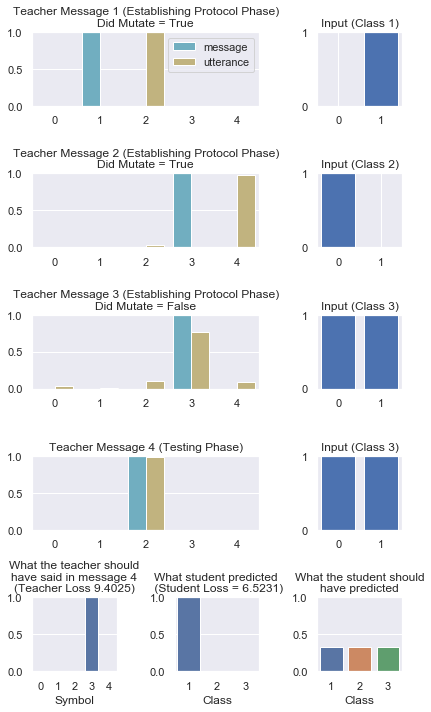

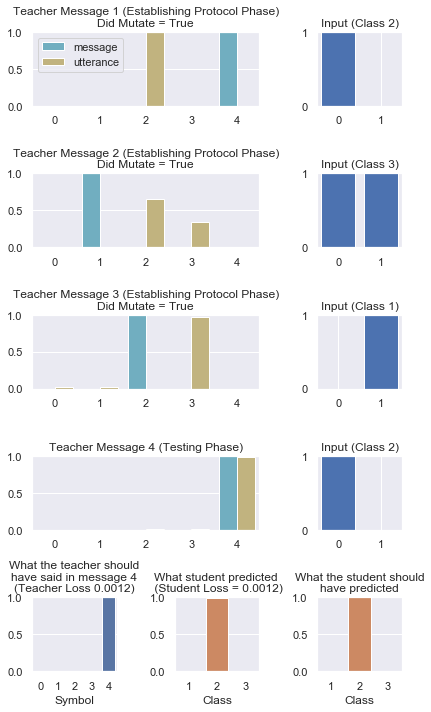

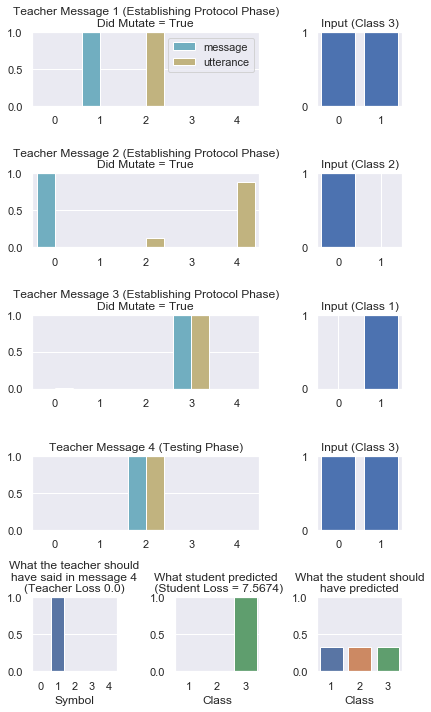

In [28]:
for i in range(5):
    inputs, targets, outputs = games_played[i]
    plot_game(inputs, outputs, targets, select_batch=0)

In [67]:
tf_meta_experiment = MetaExperiment(
    create_experiment_fn=create_temporal_fixing_experiment,
    num_experiments=4,
    epochs=15,
    export_location='./experiments/temporally_fixed',
)

In [68]:
tf_meta_experiment.run()

Running meta_experiment...
training_params_results
Test Loss: 1.015, Ground Truth F1-Score: 1.0, Student Error: 0.0, Teacher Error: 0.015, Protocol Diversity: 1.0, Protocol Entropy: 0.0,
vanilla_params_results
Test Loss: 1.014, Ground Truth F1-Score: 1.0, Student Error: 0.0, Teacher Error: 0.014, Protocol Diversity: 1.0, Protocol Entropy: 0.0,
training_params_results
Test Loss: 1.013, Ground Truth F1-Score: 1.0, Student Error: 0.001, Teacher Error: 0.012, Protocol Diversity: 1.0, Protocol Entropy: 0.0,
vanilla_params_results
Test Loss: 1.013, Ground Truth F1-Score: 1.0, Student Error: 0.001, Teacher Error: 0.012, Protocol Diversity: 1.0, Protocol Entropy: 0.0,
training_params_results
Test Loss: 1.005, Ground Truth F1-Score: 1.0, Student Error: 0.0, Teacher Error: 0.005, Protocol Diversity: 1.0, Protocol Entropy: 0.0,
vanilla_params_results
Test Loss: 1.005, Ground Truth F1-Score: 1.0, Student Error: 0.0, Teacher Error: 0.005, Protocol Diversity: 1.0, Protocol Entropy: 0.0,
training_par

In [69]:
of_meta_experiment = MetaExperiment(
    create_experiment_fn=create_observation_fixing_experiment,
    num_experiments=4,
    epochs=15,
    export_location='./experiments/observation_fixed',
)

In [70]:
of_meta_experiment.run()

Running meta_experiment...
training_params_results
Test Loss: 2.487, Ground Truth F1-Score: 0.652, Student Error: 0.487, Teacher Error: 0.0, Protocol Diversity: 0.5, Protocol Entropy: 0.16,
vanilla_params_results
Test Loss: 2.463, Ground Truth F1-Score: 0.64, Student Error: 0.463, Teacher Error: 0.0, Protocol Diversity: 0.5, Protocol Entropy: 0.16,
training_params_results
Test Loss: 1.0, Ground Truth F1-Score: 1.0, Student Error: 0.0, Teacher Error: 0.0, Protocol Diversity: 1.0, Protocol Entropy: 0.0,
vanilla_params_results
Test Loss: 1.0, Ground Truth F1-Score: 1.0, Student Error: 0.0, Teacher Error: 0.0, Protocol Diversity: 1.0, Protocol Entropy: 0.0,
training_params_results
Test Loss: 1.0, Ground Truth F1-Score: 1.0, Student Error: 0.0, Teacher Error: 0.0, Protocol Diversity: 1.0, Protocol Entropy: 0.0,
vanilla_params_results
Test Loss: 1.0, Ground Truth F1-Score: 1.0, Student Error: 0.0, Teacher Error: 0.0, Protocol Diversity: 1.0, Protocol Entropy: 0.0,
training_params_results
Tes

In [71]:
zs_results = [
    metrics['mean_ground_truth_f1']
    for stranger_pairings in of_meta_experiment.results
    for metrics in stranger_pairings['vanilla_params_test_metrics']
]

print('Final mean zero-shot test performance for OF-agents:', 
      round(float(np.mean(zs_results)), 4), '+-', 
      round(float(np.std(zs_results)), 4))

Final mean zero-shot test performance for OF-agents: 0.3682 +- 0.2268


In [72]:
zs_results = [
    metrics['mean_ground_truth_f1']
    for stranger_pairings in tf_meta_experiment.results
    for metrics in stranger_pairings['vanilla_params_test_metrics']
]

print('Final mean zero-shot test performance for TF-agents:', 
      round(float(np.mean(zs_results)), 4), '+-', 
      round(float(np.std(zs_results)), 4))

Final mean zero-shot test performance for TF-agents: 0.3193 +- 0.1583
